In [1]:
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_36944/2264190418.py:7: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  mask = hp.read_map(pathmask, verbose=False)


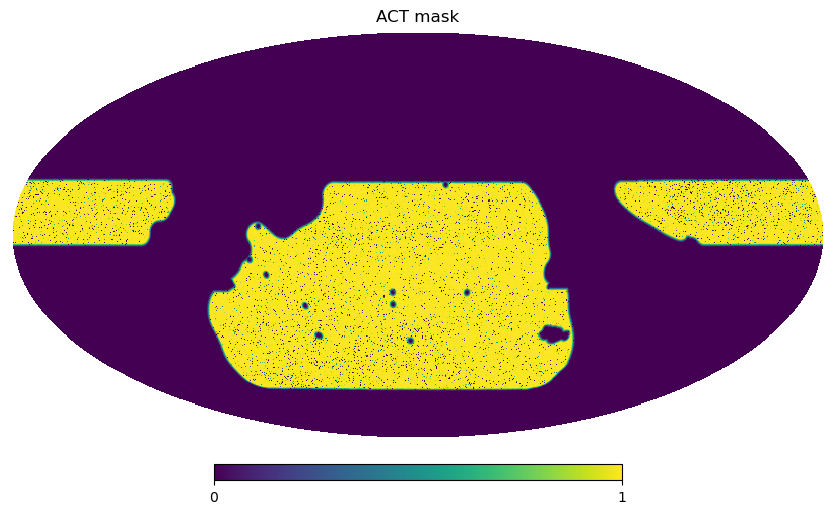

In [4]:
# testing generated mask
import numpy as np
import healpy as hp

DAT = '/mnt/d/data_large/unwise_sz/'
pathmask = DAT+'ACT/mask/healpix_act_mask_nside2048.fits'
mask = hp.read_map(pathmask, verbose=False)

hp.mollview(mask, title='ACT mask', min=0, max=1)

# Data casting in di

This is inevitable, for the initial data is f8, exceeding the memory limit, but downcasting also costs a huge time.

In [2]:
import assets.deprojection_index as di
DAT = di.DAT
map_ACT_codex = di.get_ymap_index_act()
mask_ACT_pathlist = di.get_ACT_mask_path()

In [ ]:
for index in map_ACT_codex[:1]:
    enmap_ACT_sample,header = index.read()

In [3]:
mask_ACT_codex = di.get_mask_index_act()
for index in mask_ACT_codex:
    print(index.filename)

cluster_mask.fits
inpainted_regions_mask.fits
mask_subtracted_sources.fits
wide_mask_GAL070_apod_1.50_deg_wExtended_hd.fits


(10320, 43200)


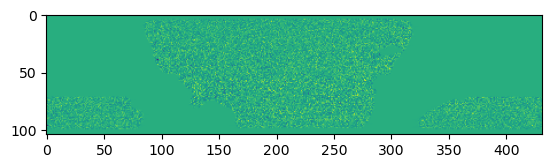

In [14]:
print(enmap_ACT_sample.shape)
import matplotlib.pyplot as plt
plt.imshow(enmap_ACT_sample[::100,::100])

In [15]:
print(type(enmap_ACT_sample))
print(enmap_ACT_sample.shape)
print(enmap_ACT_sample.dtype)

<class 'numpy.ndarray'>
(10320, 43200)
float32


In [16]:
for index in map_ACT_codex[:1]:
    healpix_act_map = index.generate_map()

print(healpix_act_map.shape)

Generating HEALPix map...
(50331648,)


In [20]:
# mask_paths = di.get_ACT_mask_path()

# from astropy.io import fits

# with fits.open(mask_paths[0]) as hdul:
#     mask = hdul[0].data

# print(mask.shape)
import numpy as np
import healpy as hp
from astropy.io import fits
from pixell import enmap, utils, reproject, wcsutils

mask_ACT_codex = di.get_mask_index_act()
nside = 256

enmap_shape = mask_ACT_codex[0].shape()
mask_act_enmap = np.ones(enmap_shape).astype(np.float32)
print(mask_act_enmap.shape)

for index in mask_ACT_codex[:2]:
    mask_enmap,header = index.read()
    wcs = wcsutils.WCS(header)
    mask_act_enmap *= mask_enmap
    print("finished reading {}".format(index))
    # print(index,wcs)
    # plt.imshow(mask_enmap[::100,::100])
    # plt.show()
    # print(mask_enmap.shape)
    # print(mask_enmap.dtype)
    # print(type(mask_enmap))

    
    

# mask_enmap,header = index.read()
# plt.imshow(mask_act_enmap[::100,::100])

: 

In [ ]:
import healpy as hp
hp.mollview(healpix_act_mask, title="ACT mask {}".format(index.filename))

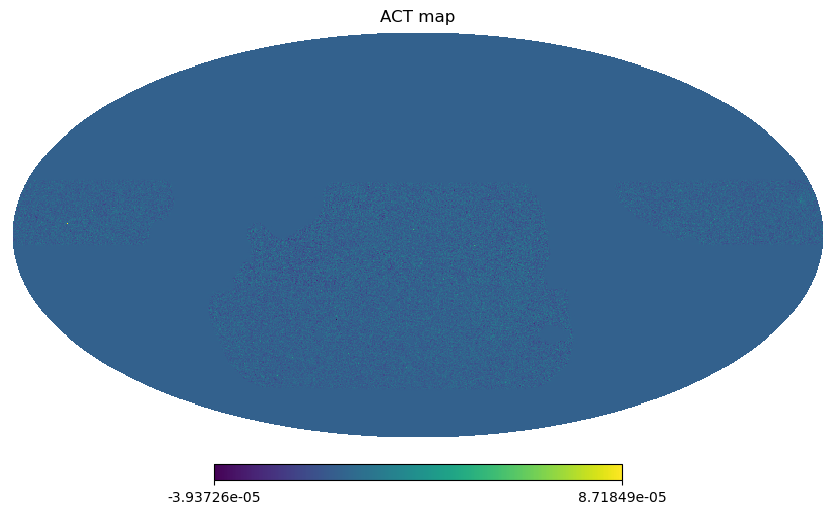

In [14]:
import healpy as hp
hp.mollview(healpix_act_map, title="ACT map")

In [3]:
import assets.make_galaxy_map as mgm
mask_unWISE = mgm.readmask()

Reading mask...


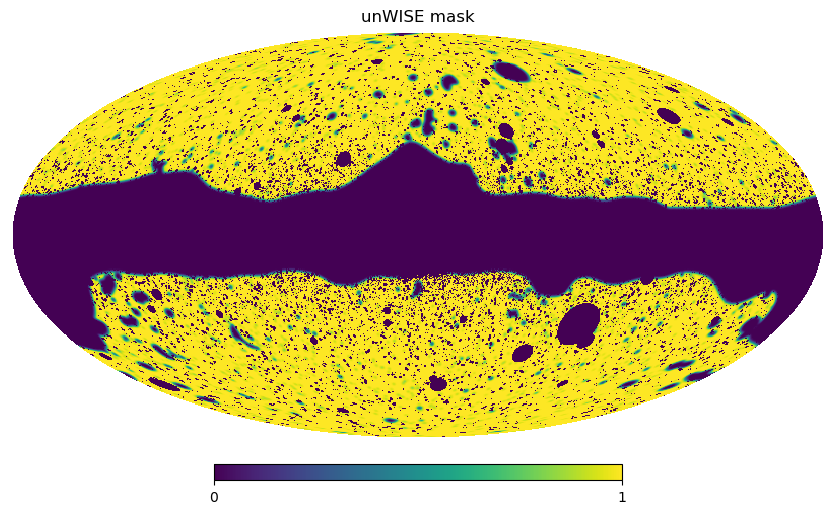

In [4]:
import healpy as hp
import numpy as np

hp.mollview(mask_unWISE, title='unWISE mask')

## Test ground for all data path handles

In [1]:
DAT = '/mnt/d/data_large/unwise_sz/'

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename_list = os.listdir(DAT+'ACT/deprojections/cib_cibdbeta/') 

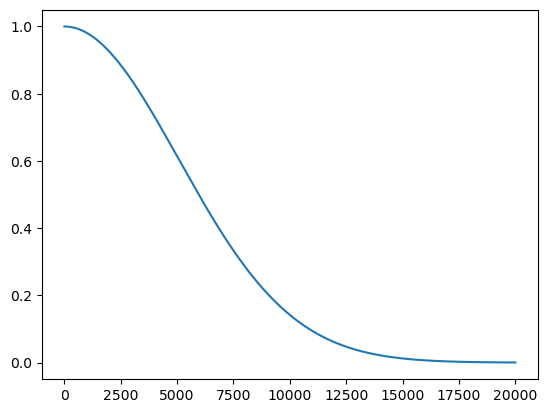

In [4]:
path_beam = '/mnt/d/data_large/unwise_sz/ACT/act_beam/effective_beam.txt'
beam = np.loadtxt(path_beam,skiprows=1)
ells = beam[:,0]
beam = beam[:,1]
plt.plot(ells,beam)
# plt.yscale('log')

In [3]:
print('Number of files:', len(filename_list))

for i, filename in enumerate(filename_list):
    nameparts = filename.split('_')
    print(i,'nu=',float(nameparts[-2]),'T=',float(nameparts[-1][:-5]))

Number of files: 18
0 nu= 1.0 T= 10.7
1 nu= 1.0 T= 24.0
2 nu= 1.15 T= 24.0
3 nu= 1.2 T= 10.7
4 nu= 1.2 T= 24.0
5 nu= 1.3 T= 24.0
6 nu= 1.35 T= 24.0
7 nu= 1.45 T= 24.0
8 nu= 1.4 T= 10.7
9 nu= 1.4 T= 24.0
10 nu= 1.6 T= 10.7
11 nu= 1.6 T= 24.0
12 nu= 1.7 T= 10.7
13 nu= 1.7 T= 24.0
14 nu= 1.8 T= 10.7
15 nu= 1.8 T= 24.0
16 nu= 2.0 T= 10.7
17 nu= 2.0 T= 24.0


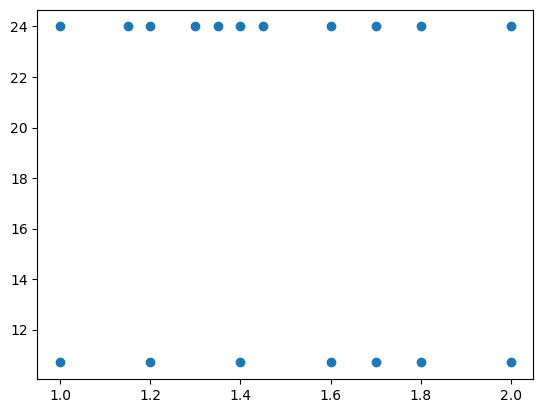

In [4]:
nu  = [float(name.split('_')[-2]) for name in filename_list]
T   = [float(name.split('_')[-1][:-5]) for name in filename_list]

plt.scatter(nu, T)

In [5]:
print(filename_list[0])

ilc_actplanck_ymap_deproj_cib_cibdBeta_1.0_10.7.fits


In [6]:
import assets.deprojection_index as dedex

codex = dedex.get_ymap_index_act()

In [7]:
for item in codex:
    path = item.path
    nu = item.nu
    T = item.T
    print(path, nu, T)

/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.0_10.7.fits 1.0 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.0_24.0.fits 1.0 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.2_10.7.fits 1.2 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.2_24.0.fits 1.2 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.4_10.7.fits 1.4 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.4_24.0.fits 1.4 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.6_10.7.fits 1.6 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.6_24.0.fits 1.6 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.7_10.7.fits 1.7 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_depr

In [1]:
from assets import make_galaxy_map as galmake
import healpy as hp

Reading weights...
Reading mask...
Making galaxy map 1


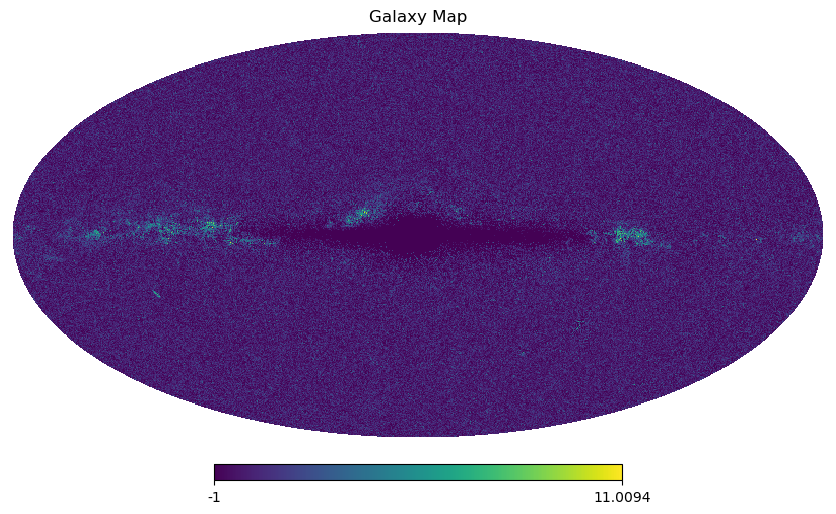

In [2]:
galaxy = galmake.makemap(1)
hp.mollview(galaxy, title='Galaxy Map')

In [3]:
from astropy.io import fits

print('Reading mask...')
mask = hp.read_map(galmake.pathmask)
lost = fits.open(galmake.lostmap)
mask_lost = lost[0].data
invalid = mask_lost == 0

galmask = mask * invalid
# hp.mollview(galmask, title='Galaxy Mask')

Reading mask...


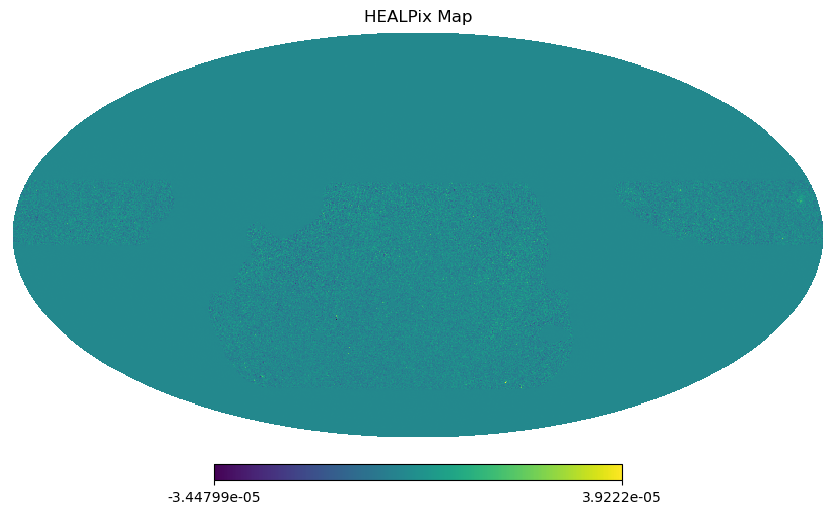

In [18]:
from astropy.io import fits
from pixell import enmap, utils, reproject, wcsutils

item = codex[0]
path = item.path

with fits.open(path) as hdulist:
    data = hdulist[0].data
    header = hdulist[0].header

# Create an enmap object from the data and WCS header
wcs = wcsutils.WCS(header)
flat_map = enmap.ndmap(data, wcs)

# Set the desired HEALPix resolution (nside)
nside = 2048  # You can choose an appropriate nside for your use case

# Convert the enmap to a HEALPix map using reproject.enmap2healpix
healpix_map = reproject.healpix_from_enmap(flat_map, nside=nside, lmax=3*nside-1)

# Save the HEALPix map to a FITS file
hp.mollview(healpix_map, title='HEALPix Map')